In [22]:
# Libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from keras import models
from keras import layers

In [23]:
# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [24]:
print(type(X), X.shape)
print(type(y), y.shape)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

<class 'numpy.ndarray'> (1000, 2)
<class 'numpy.ndarray'> (1000,)
First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [25]:
# Make DataFrame of circle data
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [26]:
print(circles.label.value_counts())

label
1    500
0    500
Name: count, dtype: int64


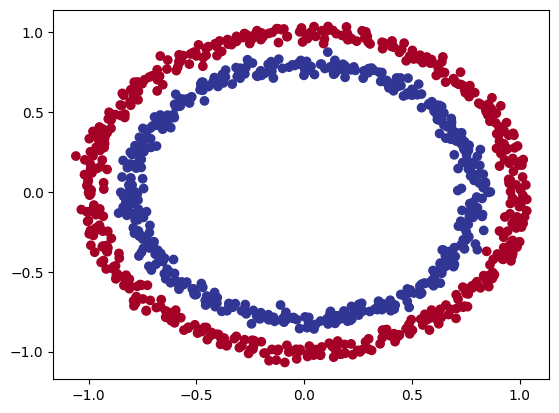

In [27]:
# plot the data
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [29]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(X_train[:5])
print(y_train[:5])

<class 'numpy.ndarray'> (800, 2)
<class 'numpy.ndarray'> (800,)
[[ 0.65794626 -0.46508097]
 [ 0.63194897 -0.7346633 ]
 [-1.00861631 -0.12403051]
 [-0.96657519 -0.22562157]
 [-0.16659009  0.79944645]]
[1 0 0 0 1]


In [30]:
# Building a model
# Build a binary classification model for circles
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/Users/jcolamendy/python/tutorials/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# See the output of the model
# If y_pred_probs >= 0.5, y=1 (class 1)
# If y_pred_probs < 0.5, y=0 (class 0)
y_pred = model.predict(X_test[:5])
print(y_pred)
print(y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.50767606]
 [0.4904672 ]
 [0.47546482]
 [0.50252473]
 [0.57275516]]
[1 0 1 0 1]


In [32]:
from keras.optimizers import SGD

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
no_epochs = 50
history = model.fit(X_train,
                    y_train,
                    epochs=no_epochs,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5058 - loss: 0.6991 - val_accuracy: 0.4700 - val_loss: 0.6994
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4978 - loss: 0.6986 - val_accuracy: 0.4600 - val_loss: 0.6991
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5033 - loss: 0.6978 - val_accuracy: 0.4700 - val_loss: 0.6988
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4988 - loss: 0.6971 - val_accuracy: 0.4800 - val_loss: 0.6986
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4974 - loss: 0.6970 - val_accuracy: 0.4800 - val_loss: 0.6985
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4965 - loss: 0.6964 - val_accuracy: 0.4750 - val_loss: 0.6983
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4964 - loss: 0.6960 - val_accuracy: 0.4750 - val_loss: 0.6982
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4952 - loss: 0.6957 - val_accuracy: 0.4800 - val_loss: 0.6980


In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

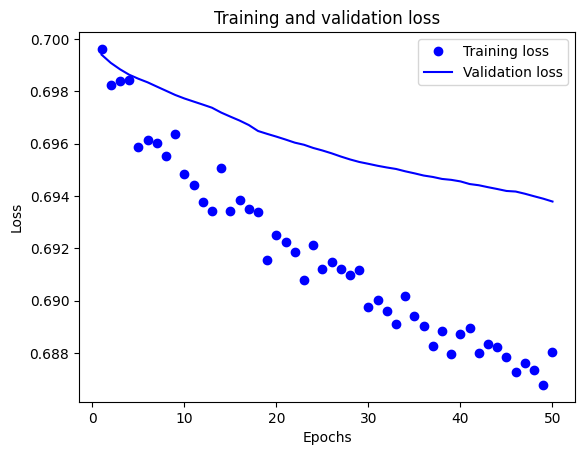

In [36]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, no_epochs + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

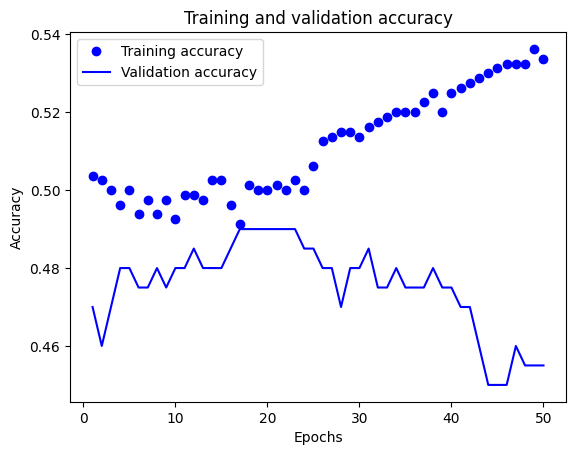

In [37]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, no_epochs + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# evaluate
results = model.evaluate(X_test, y_test)
print(results)
# accuracy of 57%

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.4655 - loss: 0.6944
[0.6954503655433655, 0.45500001311302185]


In [39]:
# predict
# generate the likelihood of belonging to a class_0 or class_1
result = model.predict(X_test[:5])
print(result)
print(np.round(result))
print(y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5149032 ]
 [0.48998916]
 [0.46334687]
 [0.5043152 ]
 [0.5239253 ]]
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]]
[1 0 1 0 1]


In [40]:
# predict
def predict_classes(predictions, threshold=0.5):
    return (predictions >= threshold).astype(int)
    
# generate the likelihood of belonging to a class_0 or class_1
result = model.predict(X_test[:5])
print(result)
predicted_classes = predict_classes(results)
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.5149032 ]
 [0.48998916]
 [0.46334687]
 [0.5043152 ]
 [0.5239253 ]]


TypeError: '>=' not supported between instances of 'list' and 'float'